In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Dow_jones = pd.read_csv('/content/Processed_DJI.csv')
Nasdaq = pd.read_csv('/content/Processed_NASDAQ.csv')
Nyse = pd.read_csv('/content/Processed_NYSE.csv')
Russell = pd.read_csv('/content/Processed_RUSSELL.csv')
S_P = pd.read_csv('/content/Processed_S&P.csv')

In [ ]:
print(Dow_jones.shape)
print(Nasdaq.shape)
print(Nyse.shape)
print(Russell.shape)
print(S_P.shape)

(1984, 84)
(1984, 84)
(1984, 84)
(1984, 84)
(1984, 84)


In [ ]:
print(Dow_jones.isnull().sum().sum())
print(Nasdaq.isnull().sum().sum())
print(Nyse.isnull().sum().sum())
print(Russell.isnull().sum().sum())
print(S_P.isnull().sum().sum())

3031
3029
3029
3029
3029


In [ ]:
Dow_jones.fillna(Dow_jones.median(),inplace = True)
Nasdaq.fillna(Nasdaq.median(),inplace = True)
Nyse.fillna(Nyse.median(),inplace = True)
Russell.fillna(Russell.median(),inplace = True)
S_P.fillna(S_P.median(),inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-p

In [ ]:
print(Dow_jones.isnull().sum().sum())
print(Nasdaq.isnull().sum().sum())
print(Nyse.isnull().sum().sum())
print(Russell.isnull().sum().sum())
print(S_P.isnull().sum().sum())

0
0
0
0
0


In [ ]:
S_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1984 non-null   object 
 1   Close           1984 non-null   float64
 2   Volume          1984 non-null   float64
 3   mom             1984 non-null   float64
 4   mom1            1984 non-null   float64
 5   mom2            1984 non-null   float64
 6   mom3            1984 non-null   float64
 7   ROC_5           1984 non-null   float64
 8   ROC_10          1984 non-null   float64
 9   ROC_15          1984 non-null   float64
 10  ROC_20          1984 non-null   float64
 11  EMA_10          1984 non-null   float64
 12  EMA_20          1984 non-null   float64
 13  EMA_50          1984 non-null   float64
 14  EMA_200         1984 non-null   float64
 15  DTB4WK          1984 non-null   float64
 16  DTB3            1984 non-null   float64
 17  DTB6            1984 non-null   f

In [ ]:
# I will prepare the data as it should be like the paper said
Dow_jones['Day'] = pd.to_datetime(Dow_jones['Date']).dt.weekday
Nasdaq['Day'] = pd.to_datetime(Nasdaq['Date']).dt.weekday
Nyse['Day'] = pd.to_datetime(Nyse['Date']).dt.weekday
Russell['Day'] = pd.to_datetime(Russell['Date']).dt.weekday
S_P['Day'] = pd.to_datetime(S_P['Date']).dt.weekday

In [ ]:
# The paper said they have 82 features and We have here 84 so it means that have two more features
# The first one is the Name and the second is mom and now as I added additional varaible which is Day
# now We have to drop Date or put it as it's our index
Dow_jones.index = pd.to_datetime(Dow_jones['Date'], format='%Y.%m.%d')
Nasdaq.index = pd.to_datetime(Nasdaq['Date'], format='%Y.%m.%d')
Nyse.index = pd.to_datetime(Nyse['Date'], format='%Y.%m.%d')
Russell.index = pd.to_datetime(Russell['Date'], format='%Y.%m.%d')
S_P.index = pd.to_datetime(S_P['Date'], format='%Y.%m.%d')

In [ ]:
Dow_jones.drop(['Date','Name','mom'],axis=1,inplace=True)
Nasdaq.drop(['Date','Name','mom'],axis=1,inplace=True)
Nyse.drop(['Date','Name','mom'],axis=1,inplace=True)
Russell.drop(['Date','Name','mom'],axis=1,inplace=True)
S_P.drop(['Date','Name','mom'],axis=1,inplace=True)

In [ ]:
# Now We check that We have the same features as the paper 
print(Dow_jones.shape)
print(Nasdaq.shape)
print(Nyse.shape)
print(Russell.shape)
print(S_P.shape)

(1984, 82)
(1984, 82)
(1984, 82)
(1984, 82)
(1984, 82)


In [ ]:
# Now we need to normalize the data
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler =  StandardScaler()

In [ ]:
# But before making normalization We need to split the data
def split_data(df):
  
  train_df = df[:1191]
  val_df = df[1191:1587]
  test_df = df[1587:]

  return train_df,val_df,test_df

In [ ]:
columns_names = list(Dow_jones.columns)
columns_names.remove('Day')

In [ ]:
# So I will start by using Dow Jones
Dow_jones_train, Dow_jones_val, Dow_jones_test = split_data(Dow_jones)

In [ ]:
# So I make standardization for all the features but for not Day feature
Dowjones_scaler_train = pd.DataFrame(std_scaler.fit_transform(Dow_jones_train.iloc[:,:-1]),columns=columns_names)

In [ ]:
Dowjones_scaler_val = pd.DataFrame(std_scaler.transform(Dow_jones_val.iloc[:,:-1]),columns=columns_names)
Dowjones_scaler_test = pd.DataFrame(std_scaler.transform(Dow_jones_test.iloc[:,:-1]),columns=columns_names)

In [ ]:
Dowjones_scaler_train['Day'] = Dow_jones['Day'][:1191]
Dowjones_scaler_val['Day'] = Dow_jones['Day'][1191:1587]
Dowjones_scaler_test['Day'] = Dow_jones['Day'][1587:]

In [ ]:
# Now We have done preparation as the paper said
# Now I will try to implement the model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential  

In [ ]:
model = Sequential()

In [ ]:
model.add(layers.Conv2D(8,(1,82),activation='relu'))

In [ ]:
(S_P["Close"].pct_change().shift(-1) > 0).astype(int)

Date
2009-12-31    1
2010-01-04    1
2010-01-05    1
2010-01-06    1
2010-01-07    1
             ..
2017-11-09    0
2017-11-10    1
2017-11-13    0
2017-11-14    0
2017-11-15    0
Name: Close, Length: 1984, dtype: int64

In [ ]:
S_P["Close"]

Date
2009-12-31    1115.099976
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
                 ...     
2017-11-09    2584.620117
2017-11-10    2582.300049
2017-11-13    2584.840088
2017-11-14    2578.870117
2017-11-15    2564.620117
Name: Close, Length: 1984, dtype: float64

In [ ]:
import numpy as np
np.random.seed(42)

In [ ]:
import os
import random
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error,mean_squared_error

DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def cnnpred_2d(seq_len=60, n_features=82, n_filters=(8,8,8), droprate=0.1):
    "2D-CNNpred model according to the paper"
    model = Sequential([
        Input(shape=(seq_len, n_features, 1)),
        Conv2D(n_filters[0], kernel_size=(1, n_features), activation="relu"),
        Conv2D(n_filters[1], kernel_size=(3,1), activation="relu"),
        MaxPool2D(pool_size=(2,1)),
        Conv2D(n_filters[2], kernel_size=(3,1), activation="relu"),
        MaxPool2D(pool_size=(2,1)),
        Flatten(),
        #Dropout(droprate),
        Dense(1, activation="sigmoid")
    ])
    return model

def datagen(data, seq_len, batch_size, targetcol, kind):
    "As a generator to produce samples for Keras model"
    batch = []
    while True:
        # Pick one dataframe from the pool
        key = random.choice(list(data.keys()))
        df = data[key]
        input_cols = [c for c in df.columns if c != targetcol]
        index = df.index[df.index < TRAIN_TEST_CUTOFF]
        split = int(len(index) * TRAIN_VALID_RATIO)
        assert split > seq_len, "Training data too small for sequence length {}".format(seq_len)
        if kind == 'train':
            index = index[:split]   # range for the training set
        elif kind == 'valid':
            index = index[split:]   # range for the validation set
        else:
            raise NotImplementedError
        # Pick one position, then clip a sequence length
        while True:
            t = random.choice(index)     # pick one time step
            n = (df.index == t).argmax() # find its position in the dataframe
            if n-seq_len+1 < 0:
                continue # this sample is not enough for one sequence length
            frame = df.iloc[n-seq_len+1:n+1]
            batch.append([frame[input_cols].values, df.loc[t, targetcol]])
            break
        # if we get enough for a batch, dispatch
        if len(batch) == batch_size:
            X, y = zip(*batch)
            X, y = np.expand_dims(np.array(X), 3), np.array(y)
            yield X, y
            batch = []

def testgen(data, seq_len, targetcol):
    "Return array of all test samples"
    batch = []
    for key, df in data.items():
        input_cols = [c for c in df.columns if c != targetcol]
        # find the start of test sample
        t = df.index[df.index >= TRAIN_TEST_CUTOFF][0]
        n = (df.index == t).argmax()
        # extract sample using a sliding window
        for i in range(n+1, len(df)+1):
            frame = df.iloc[i-seq_len:i]
            batch.append([frame[input_cols].values, frame[targetcol][-1]])
    X, y = zip(*batch)
    return np.expand_dims(np.array(X),3), np.array(y)

# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

seq_len = 60
batch_size = 128
n_epochs = 8
n_features = 82

# Produce CNNpred as a binary classification problem
model = cnnpred_2d(seq_len, n_features)
model.compile(optimizer="adam", loss="mae", metrics=["acc", f1macro])
model.summary()  # print model structure to console

# Set up callbacks and fit the model
# We use custom validation score f1macro() and hence monitor for "val_f1macro"
checkpoint_path = "./cp2d-{epoch}-{val_f1macro:.2f}.h5"
callbacks = [
    ModelCheckpoint(checkpoint_path,
                    monitor='val_f1macro', mode="max",
                    verbose=0, save_best_only=True, save_weights_only=False, save_freq="epoch")
]
model.fit(datagen(data, seq_len, batch_size, "Target", "train"),
          validation_data=datagen(data, seq_len, batch_size, "Target", "valid"),
          epochs=n_epochs, steps_per_epoch=400, validation_steps=10, verbose=1, callbacks=callbacks)

# Prepare test data
test_data, test_target = testgen(data, seq_len, "Target")

# Test the model
test_out = model.predict(test_data)
test_pred = (test_out > 0.5).astype(int)
print("accuracy:", accuracy_score(test_pred, test_target))
print("MAE:", mean_absolute_error(test_pred, test_target))
print("F1:", f1_score(test_pred, test_target))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 1, 8)          664       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 1, 8)          200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 1, 8)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 1, 8)          200       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 1, 8)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 104)               0

In [ ]:
DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def cnnpred_3d(seq_len=60, n_stocks=5, n_features=82, n_filters=(8,8,8), droprate=0.1):
    "3D-CNNpred model according to the paper"
    model = Sequential([
        Input(shape=(n_stocks, seq_len, n_features)),
        Conv2D(n_filters[0], kernel_size=(1,1), activation="relu", data_format="channels_last"),
        Conv2D(n_filters[1], kernel_size=(n_stocks,3), activation="relu"),
        MaxPool2D(pool_size=(1,2)),
        Conv2D(n_filters[2], kernel_size=(1,3), activation="relu"),
        MaxPool2D(pool_size=(1,2)),
        Flatten(),
        Dropout(droprate),
        Dense(1, activation="sigmoid")
    ])
    return model

def datagen(data, seq_len, batch_size, target_index, targetcol, kind):
    "As a generator to produce samples for Keras model"
    # Learn about the data's features and time axis
    input_cols = [c for c in data.columns if c[0] != targetcol]
    tickers = sorted(set(c for _,c in input_cols))
    n_features = len(input_cols) // len(tickers)
    index = data.index[data.index < TRAIN_TEST_CUTOFF]
    split = int(len(index) * TRAIN_VALID_RATIO)
    assert split > seq_len, "Training data too small for sequence length {}".format(seq_len)
    if kind == "train":
        index = index[:split]   # range for the training set
    elif kind == 'valid':
        index = index[split:]   # range for the validation set
    else:
        raise NotImplementedError
    # Infinite loop to generate a batch
    batch = []
    while True:
        # Pick one position, then clip a sequence length
        while True:
            t = random.choice(index)
            n = (data.index == t).argmax()
            if n-seq_len+1 < 0:
                continue # this sample is not enough for one sequence length
            frame = data.iloc[n-seq_len+1:n+1][input_cols]
            # convert frame with two level of indices into 3D array
            shape = (len(tickers), len(frame), n_features)
            X = np.full(shape, np.nan)
            for i,ticker in enumerate(tickers):
                X[i] = frame.xs(ticker, axis=1, level=1).values
            batch.append([X, data[targetcol][target_index][t]])
            break
        # if we get enough for a batch, dispatch
        if len(batch) == batch_size:
            X, y = zip(*batch)
            yield np.array(X), np.array(y)
            batch = []

def testgen(data, seq_len, target_index, targetcol):
    "Return array of all test samples"
    input_cols = [c for c in data.columns if c[0] != targetcol]
    tickers = sorted(set(c for _,c in input_cols))
    n_features = len(input_cols) // len(tickers)
    t = data.index[data.index >= TRAIN_TEST_CUTOFF][0]
    n = (data.index == t).argmax()
    batch = []
    for i in range(n+1, len(data)+1):
        # Clip a window of seq_len ends at row position i-1
        frame = data.iloc[i-seq_len:i]
        target = frame[targetcol][target_index][-1]
        frame = frame[input_cols]
        # convert frame with two level of indices into 3D array
        shape = (len(tickers), len(frame), n_features)
        X = np.full(shape, np.nan)
        for i,ticker in enumerate(tickers):
            X[i] = frame.xs(ticker, axis=1, level=1).values
        batch.append([X, target])
    X, y = zip(*batch)
    return np.array(X), np.array(y)

# Read data into pandas DataFrames
data = {}
for filename in os.listdir(DATADIR):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join(DATADIR, filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

# Transform data into 3D dataframe (multilevel columns)
for key, df in data.items():
    df.columns = pd.MultiIndex.from_product([df.columns, [key]])
data = pd.concat(data.values(), axis=1)

seq_len = 60
batch_size = 128
n_epochs = 5
n_features = 82
n_stocks = 5

# Produce CNNpred as a binary classification problem
model = cnnpred_3d(seq_len, n_stocks, n_features)
model.compile(optimizer="adam", loss="mae", metrics=["acc", f1macro])
model.summary() # print model structure to console

# Set up callbacks and fit the model
# We use custom validation score f1macro() and hence monitor for "val_f1macro"
checkpoint_path = "./cp3d-{epoch}-{val_f1macro:.2f}.h5"
callbacks = [
    ModelCheckpoint(checkpoint_path,
                    monitor='val_f1macro', mode="max",
                    verbose=0, save_best_only=True, save_weights_only=False, save_freq="epoch")
]

model.fit(datagen(data, seq_len, batch_size, "DJI", "Target", "train"),
          validation_data=datagen(data, seq_len, batch_size, "DJI", "Target", "valid"),
          epochs=n_epochs, steps_per_epoch=400, validation_steps=10, verbose=1, callbacks=callbacks)

# Prepare test data
test_data, test_target = testgen(data, seq_len, "DJI", "Target")

# Test the model
test_out = model.predict(test_data)
test_pred = (test_out > 0.5).astype(int)
print("accuracy:", accuracy_score(test_pred, test_target))
print("MAE:", mean_absolute_error(test_pred, test_target))
print("F1:", f1_score(test_pred, test_target))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 5, 60, 8)          664       
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 58, 8)          968       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 29, 8)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 27, 8)          200       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 13, 8)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 104)              

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from tensorflow.keras.layers import LSTM

DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def lstm_model(seq_len=60, n_features=82):
    "2D-CNNpred model according to the paper"
    model = Sequential([
        Input(shape=(seq_len,n_features)),
        #Conv2D(8, kernel_size=(1, n_features), activation="relu"),
        #MaxPool2D(pool_size=(2,1)),
        #Flatten(),
        LSTM(32, activation="relu",return_sequences=True),
        Dropout(0.4),
        LSTM(16, activation="relu"),
        Dropout(0.4),
        Dense(16,activation="relu"),
        #Dropout(droprate),
        Dense(1, activation="sigmoid")
    ])
    return model

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

def datagen(data, seq_len, batch_size, targetcol, kind):
    "As a generator to produce samples for Keras model"
    batch = []
    while True:
        # Pick one dataframe from the pool
        key = random.choice(list(data.keys()))
        df = data[key]
        input_cols = [c for c in df.columns if c != targetcol]
        index = df.index[df.index < TRAIN_TEST_CUTOFF]
        split = int(len(index) * TRAIN_VALID_RATIO)
        assert split > seq_len, "Training data too small for sequence length {}".format(seq_len)
        if kind == 'train':
            index = index[:split]   # range for the training set
        elif kind == 'valid':
            index = index[split:]   # range for the validation set
        else:
            raise NotImplementedError
        # Pick one position, then clip a sequence length
        while True:
            t = random.choice(index)     # pick one time step
            n = (df.index == t).argmax() # find its position in the dataframe
            if n-seq_len+1 < 0:
                continue # this sample is not enough for one sequence length
            frame = df.iloc[n-seq_len+1:n+1]
            batch.append([frame[input_cols].values, df.loc[t, targetcol]])
            break
        # if we get enough for a batch, dispatch
        if len(batch) == batch_size:
            X, y = zip(*batch)
            X, y = np.expand_dims(np.array(X), 3), np.array(y)
            yield X.reshape((X.shape[0],X.shape[1],82)), y.astype(np.float)
            batch = []

def testgen(data, seq_len, targetcol):
    "Return array of all test samples"
    batch = []
    for key, df in data.items():
        input_cols = [c for c in df.columns if c != targetcol]
        # find the start of test sample
        t = df.index[df.index >= TRAIN_TEST_CUTOFF][0]
        n = (df.index == t).argmax()
        # extract sample using a sliding window
        for i in range(n+1, len(df)+1):
            frame = df.iloc[i-seq_len:i]
            batch.append([frame[input_cols].values, frame[targetcol][-1]])
    X, y = zip(*batch)
    #return np.expand_dims(np.array(X),3), np.array(y)
    X, y = np.expand_dims(np.array(X), 3), np.array(y)
    #print(X.shape)
    return X.reshape((X.shape[0],X.shape[1],82)), y.astype(np.float)

# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

seq_len = 60
batch_size = 128
n_epochs = 5
n_features = 82

# Produce Lstm model as a binary classification problem
model = lstm_model(seq_len, n_features)
model.compile(optimizer="adam", loss=root_mean_squared_error, metrics=["acc", f1macro])
model.summary()  # print model structure to console

# Set up callbacks and fit the model
# We use custom validation score f1macro() and hence monitor for "val_f1macro"
checkpoint_path = "./cp2d-{epoch}-{val_f1macro:.2f}.h5"
callbacks = [
    ModelCheckpoint(checkpoint_path,
                    monitor='val_f1macro', mode="max",
                    verbose=0, save_best_only=True, save_weights_only=False, save_freq="epoch")
]

model.fit(datagen(data, seq_len, batch_size, "Target", "train"),
          validation_data=datagen(data, seq_len, batch_size, "Target", "valid"),
          epochs=n_epochs, steps_per_epoch=400, validation_steps=10, verbose=1, callbacks=callbacks)

# Prepare test data
test_data, test_target = testgen(data, seq_len, "Target")

# Test the model
test_out = model.predict(test_data)
test_pred = (test_out > 0.5).astype(int)
print("accuracy:", accuracy_score(test_pred, test_target))
print("RMSE:", mean_squared_error(test_pred, test_target))
print("F1:", f1_score(test_pred, test_target))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 32)            14720     
                                                                 
 dropout_3 (Dropout)         (None, 60, 32)            0         
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 18,145
Trainable params: 18,145
Non-trai

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


400/400 [==============================] - 156s 384ms/step - loss: 0.4816 - acc: 0.5971 - f1macro: 0.5089 - val_loss: 0.5207 - val_acc: 0.5039 - val_f1macro: 0.4731
Epoch 2/5
400/400 [==============================] - 150s 375ms/step - loss: 0.4246 - acc: 0.7247 - f1macro: 0.7149 - val_loss: 0.5956 - val_acc: 0.5477 - val_f1macro: 0.5379
Epoch 3/5
400/400 [==============================] - 146s 364ms/step - loss: 0.3464 - acc: 0.8369 - f1macro: 0.8328 - val_loss: 0.6176 - val_acc: 0.5477 - val_f1macro: 0.5440
Epoch 4/5
400/400 [==============================] - 150s 375ms/step - loss: 0.2948 - acc: 0.8901 - f1macro: 0.8873 - val_loss: 0.6223 - val_acc: 0.5469 - val_f1macro: 0.5439
Epoch 5/5
400/400 [==============================] - 149s 372ms/step - loss: 0.2695 - acc: 0.9100 - f1macro: 0.9078 - val_loss: 0.6412 - val_acc: 0.5320 - val_f1macro: 0.5314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:101: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


accuracy: 0.4946341463414634
RMSE: 0.5053658536585366
F1: 0.5795454545454545


In [ ]:
from tensorflow.keras.layers import LSTM

DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def lstm_model(seq_len=60, n_features=82):
    "2D-CNNpred model according to the paper"
    model = Sequential([
        Input(shape=(seq_len,n_features)),
        #Conv2D(8, kernel_size=(1, n_features), activation="relu"),
        #MaxPool2D(pool_size=(2,1)),
        #Flatten(),
        LSTM(32, activation="relu",return_sequences=True),
        Dropout(0.4),
        LSTM(16, activation="relu"),
        Dropout(0.4),
        Dense(16,activation="relu"),
        #Dropout(droprate),
        Dense(1, activation="sigmoid")
    ])
    return model

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

def datagen(data, seq_len, batch_size, targetcol, kind):
    "As a generator to produce samples for Keras model"
    batch = []
    while True:
        # Pick one dataframe from the pool
        key = random.choice(list(data.keys()))
        df = data[key]
        input_cols = [c for c in df.columns if c != targetcol]
        index = df.index[df.index < TRAIN_TEST_CUTOFF]
        split = int(len(index) * TRAIN_VALID_RATIO)
        assert split > seq_len, "Training data too small for sequence length {}".format(seq_len)
        if kind == 'train':
            index = index[:split]   # range for the training set
        elif kind == 'valid':
            index = index[split:]   # range for the validation set
        else:
            raise NotImplementedError
        # Pick one position, then clip a sequence length
        while True:
            t = random.choice(index)     # pick one time step
            n = (df.index == t).argmax() # find its position in the dataframe
            if n-seq_len+1 < 0:
                continue # this sample is not enough for one sequence length
            frame = df.iloc[n-seq_len+1:n+1]
            batch.append([frame[input_cols].values, df.loc[t, targetcol]])
            break
        # if we get enough for a batch, dispatch
        if len(batch) == batch_size:
            X, y = zip(*batch)
            X, y = np.expand_dims(np.array(X), 3), np.array(y)
            yield X.reshape((X.shape[0],X.shape[1],82)), y.astype(np.float)
            batch = []

def testgen(data, seq_len, targetcol):
    "Return array of all test samples"
    batch = []
    for key, df in data.items():
        input_cols = [c for c in df.columns if c != targetcol]
        # find the start of test sample
        t = df.index[df.index >= TRAIN_TEST_CUTOFF][0]
        n = (df.index == t).argmax()
        # extract sample using a sliding window
        for i in range(n+1, len(df)+1):
            frame = df.iloc[i-seq_len:i]
            batch.append([frame[input_cols].values, frame[targetcol][-1]])
    X, y = zip(*batch)
    #return np.expand_dims(np.array(X),3), np.array(y)
    X, y = np.expand_dims(np.array(X), 3), np.array(y)
    #print(X.shape)
    return X.reshape((X.shape[0],X.shape[1],82)), y.astype(np.float)

# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

seq_len = 20
batch_size = 128
n_epochs = 5
n_features = 82

# Produce lstm_pred as a binary classification problem
model = lstm_model(seq_len, n_features)
model.compile(optimizer="adam", loss=root_mean_squared_error, metrics=["acc", f1macro])
model.summary()  # print model structure to console

# Set up callbacks and fit the model
# We use custom validation score f1macro() and hence monitor for "val_f1macro"
checkpoint_path = "./cp2d-{epoch}-{val_f1macro:.2f}.h5"
callbacks = [
    ModelCheckpoint(checkpoint_path,
                    monitor='val_f1macro', mode="max",
                    verbose=0, save_best_only=True, save_weights_only=False, save_freq="epoch")
]

model.fit(datagen(data, seq_len, batch_size, "Target", "train"),
          validation_data=datagen(data, seq_len, batch_size, "Target", "valid"),
          epochs=n_epochs, steps_per_epoch=400, validation_steps=10, verbose=1, callbacks=callbacks)

# Prepare test data
test_data, test_target = testgen(data, seq_len, "Target")

# Test the model
test_out = model.predict(test_data)
test_pred = (test_out > 0.5).astype(int)
print("accuracy:", accuracy_score(test_pred, test_target))
print("RMSE:", mean_squared_error(test_pred, test_target))
print("F1:", f1_score(test_pred, test_target))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 20, 32)            14720     
                                                                 
 dropout_7 (Dropout)         (None, 20, 32)            0         
                                                                 
 lstm_7 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 18,145
Trainable params: 18,145
Non-trai

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


400/400 [==============================] - 90s 217ms/step - loss: 0.4837 - acc: 0.5946 - f1macro: 0.5052 - val_loss: 0.5460 - val_acc: 0.5625 - val_f1macro: 0.5523
Epoch 2/5
400/400 [==============================] - 87s 217ms/step - loss: 0.4242 - acc: 0.7278 - f1macro: 0.7187 - val_loss: 0.6127 - val_acc: 0.5445 - val_f1macro: 0.5424
Epoch 3/5
176/400 [============>.................] - ETA: 48s - loss: 0.3809 - acc: 0.7941 - f1macro: 0.7885

KeyboardInterrupt: ignored

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
import os
import random

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error,mean_squared_error

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75
from sklearn.metrics import mean_squared_error

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))     


def datagen(data,key):
    "As a generator to produce samples for Keras model"
    df = data[key]
    index = df.index[df.index < TRAIN_TEST_CUTOFF]
    split = len(index)

    train = df.iloc[:split,:]

    X_test = df.iloc[split:,:-1]
    y_test = df.iloc[split:,-1]

    split = int(len(index)*TRAIN_VALID_RATIO)

    X_train = train.iloc[:split,:-1]
    y_train = train.iloc[:split,-1]

    X_val = train.iloc[split:,:-1]
    y_val = train.iloc[split:,-1]

    return X_train,y_train,X_val,y_val,X_test,y_test




# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    #index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

 

# Fit the model
X_train,y_train,X_val,y_val,X_test,y_test = datagen(data,'DJI')
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        early_stopping_rounds=50,
       verbose=False)

# Test the model
test_out = reg.predict(X_test)
test_pred = (test_out > 0.5).astype(int)

print("accuracy:", accuracy_score(test_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(test_pred, y_test)))
print("F1:", f1_score(test_pred, y_test))

[09:06:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
accuracy: 0.5073170731707317
RMSE: 0.7019137602506936
F1: 0.61003861003861


In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75
from sklearn.metrics import mean_squared_error

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))     


def datagen(data,key):
    "As a generator to produce samples for Keras model"
    df = data[key]
    index = df.index[df.index < TRAIN_TEST_CUTOFF]
    split = len(index)

    train = df.iloc[:split,:]

    X_test = df.iloc[split:,:-1]
    y_test = df.iloc[split:,-1]

    split = int(len(index)*TRAIN_VALID_RATIO)

    X_train = train.iloc[:split,:-1]
    y_train = train.iloc[:split,-1]

    X_val = train.iloc[split:,:-1]
    y_val = train.iloc[split:,-1]

    return X_train,y_train,X_val,y_val,X_test,y_test




# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    #index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

 

# Fit the model
X_train,y_train,X_val,y_val,X_test,y_test = datagen(data,'DJI')
reg = xgb.XGBClassifier(objective="binary:logistic")
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        early_stopping_rounds=50,
       verbose=False)

# Test the model
test_pred = reg.predict(X_test)
#test_pred = (test_out > 0.5).astype(int)

print("accuracy:", accuracy_score(test_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(test_pred, y_test)))
print("F1:", f1_score(test_pred, y_test))

accuracy: 0.5365853658536586
RMSE: 0.6807456457050177
F1: 0.6619217081850534


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1.239175,0.013179,-0.740511,-0.784105,2.109482,-1.498050,-1.062041,-0.624606,-0.092955,-0.504664,...,0.042195,-0.698095,-0.703821,-1.183650,-0.944866,-0.421629,-0.377063,-0.148104,-0.278498,0.406972
1,1.189960,0.094849,-0.869701,-0.732221,-0.792712,2.058288,-0.899532,-0.963900,-0.299181,-0.763802,...,1.406621,0.280642,-1.019295,-0.914834,-1.027191,-2.306612,-2.156426,0.910463,0.013407,-0.099022
2,1.204166,-0.797218,0.163581,-0.861941,-0.740016,-0.745595,-0.064367,-0.874451,-0.736918,-0.610983,...,0.648607,-0.240066,0.297809,0.294841,0.548742,1.247367,1.124276,0.627479,-0.132545,-0.117762
3,1.081330,0.563787,-2.078129,0.175580,-0.871764,-0.694684,-2.035271,-1.627819,-1.314695,-0.764985,...,-0.576850,-0.741488,-1.744885,-2.072813,-0.486199,-0.853604,-0.747763,-0.514934,-0.690292,0.322640
4,1.110822,0.189860,0.422582,-2.075325,0.181982,-0.821969,-1.463069,-1.279408,-1.285538,-0.316214,...,0.686507,-0.919878,-0.553971,0.377553,0.242964,-0.186006,0.049243,0.334015,-0.810181,-1.017307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,1.091702,0.300852,0.378194,-0.020414,0.370434,0.069613,0.540853,0.859542,1.731876,1.970049,...,1.166583,-0.153281,0.392451,-0.098045,0.266485,0.403052,0.586759,1.775133,-0.221159,-0.277057
7676,1.031679,0.155009,-0.776163,0.379608,-0.020170,0.384546,0.015456,0.341004,1.049817,1.471551,...,0.016928,0.034752,-0.893105,-0.180758,-0.345071,-0.382358,-0.339993,1.177724,-0.017868,0.116494
7677,1.022934,-0.417188,-0.157859,-0.764226,0.385318,-0.001015,-0.085882,-0.141991,0.964128,1.518987,...,0.433836,2.156152,-0.088647,0.129415,-0.545003,-0.382358,-0.321458,0.674643,2.176629,2.149841
7678,0.970895,-0.228240,-0.686514,-0.151558,-0.774146,0.399237,-0.604996,-0.296510,0.791524,1.078837,...,0.042195,-0.322029,-0.593405,0.015685,0.760434,0.913568,0.827715,-0.766475,-0.466151,-0.099022


In [ ]:

from sklearn.svm import SVR

DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75
from sklearn.metrics import mean_squared_error

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))     


def datagen(data,key):
    "As a generator to produce samples for Keras model"
    df = data[key]
    index = df.index[df.index < TRAIN_TEST_CUTOFF]
    split = len(index)

    X_train = df.iloc[:split,:-1]
    y_train = df.iloc[:split,-1]

    X_test = df.iloc[split:,:-1]
    y_test = df.iloc[split:,-1]

    return X_train,y_train,X_test,y_test




# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    #index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

 

# Fit the model
X_train,y_train,X_test,y_test = datagen(data,'DJI')
model = SVR(kernel='rbf',gamma=0.5, C=10, epsilon = 0.05)

model.fit(X_train, y_train)

# Test the model
test_out = model.predict(X_test)
test_pred = (test_out > 0.5).astype(int)

print("accuracy:", accuracy_score(test_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(test_pred, y_test)))
print("F1:", f1_score(test_pred, y_test))

accuracy: 0.5414634146341464
RMSE: 0.6771532953223027
F1: 0.7025316455696203


In [ ]:
data.keys()

dict_keys(['S&P', 'NYA', 'RUT', 'NASDAQ', 'DJI'])

In [ ]:

from sklearn.svm import SVC

DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75
from sklearn.metrics import mean_squared_error

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))     


def datagen(data,key):
    "As a generator to produce samples for Keras model"
    df = data[key]
    index = df.index[df.index < TRAIN_TEST_CUTOFF]
    split = len(index)

    X_train = df.iloc[:split,:-1]
    y_train = df.iloc[:split,-1]

    X_test = df.iloc[split:,:-1]
    y_test = df.iloc[split:,-1]

    return X_train,y_train,X_test,y_test




# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    #index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

 

# Fit the model
X_train,y_train,X_test,y_test = datagen(data,'DJI')
model = SVC(kernel='rbf',gamma=0.5, C=10)

model.fit(X_train, y_train)

# Test the model
test_pred = model.predict(X_test)
#test_pred = (test_out > 0.5).astype(int)

print("accuracy:", accuracy_score(test_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(test_pred, y_test)))
print("F1:", f1_score(test_pred, y_test))

accuracy: 0.5414634146341464
RMSE: 0.6771532953223027
F1: 0.7025316455696203


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75
from sklearn.metrics import mean_squared_error

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))     


def datagen(data,key):
    "As a generator to produce samples for Keras model"
    df = data[key]
    index = df.index[df.index < TRAIN_TEST_CUTOFF]
    split = len(index)

    train = df.iloc[:split,:]

    X_test = df.iloc[split:,:-1]
    y_test = df.iloc[split:,-1]

    split = int(len(index)*TRAIN_VALID_RATIO)

    X_train = train.iloc[:split,:-1]
    y_train = train.iloc[:split,-1]

    X_val = train.iloc[split:,:-1]
    y_val = train.iloc[split:,-1]

    return X_train,y_train,X_val,y_val,X_test,y_test




# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    #index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

 

# Fit the model
X_train,y_train,X_val,y_val,X_test,y_test= datagen(data,'NYA')
error_rate = []
# Pick the best n_neighbors
for i in range(1,30):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  eval_pred = model.predict(X_val)
  error_rate.append(np.mean(eval_pred != y_val))

Text(0, 0.5, 'Error Rate')

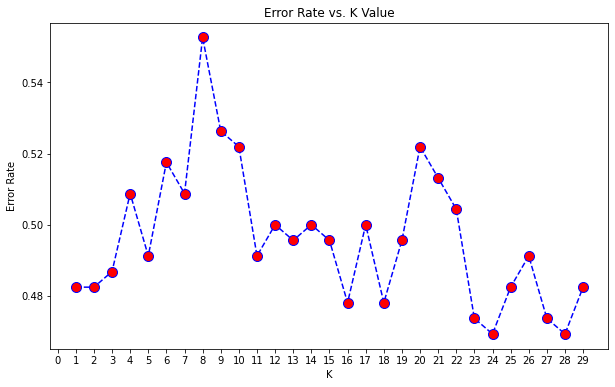

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.xticks(np.arange(0,30),np.arange(0,30))
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
model = KNeighborsClassifier(n_neighbors=28)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
#test_pred = (test_out > 0.5).astype(int)

print("accuracy:", accuracy_score(test_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(test_pred, y_test)))
print("F1:", f1_score(test_pred, y_test))

accuracy: 0.5414634146341464
RMSE: 0.6771532953223027
F1: 0.6666666666666666


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75
from sklearn.metrics import mean_squared_error

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))     


def datagen(data,key):
    "As a generator to produce samples for Keras model"
    df = data[key]
    index = df.index[df.index < TRAIN_TEST_CUTOFF]
    split = len(index)

    train = df.iloc[:split,:]

    X_test = df.iloc[split:,:-1]
    y_test = df.iloc[split:,-1]

    split = int(len(index)*TRAIN_VALID_RATIO)

    X_train = train.iloc[:split,:-1]
    y_train = train.iloc[:split,-1]

    X_val = train.iloc[split:,:-1]
    y_val = train.iloc[split:,-1]

    return X_train,y_train,X_val,y_val,X_test,y_test




# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    #index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

 

# Fit the model
X_train,y_train,X_val,y_val,X_test,y_test = datagen(data,'DJI')
mlp_model = MLPClassifier(hidden_layer_sizes=(5,2),max_iter = 300)
mlp_model.fit(X_train, y_train)

# Choosing the best hyperparameters
# define grid
param_grid = { 'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],'max_iter': [50, 100, 150],'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'],'alpha': [0.0001, 0.05],'learning_rate': ['constant','adaptive']}
grid = GridSearchCV(mlp_model, param_grid, n_jobs= -1, cv=5) 
grid.fit(X_val, y_val)  
print(grid.best_params_) 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (120, 80, 40), 'learning_rate': 'constant', 'max_iter': 150, 'solver': 'sgd'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(120, 80, 40),alpha= 0.05,max_iter = 300,solver= 'sgd')
mlp_model.fit(X_train, y_train)
# Test the model
test_pred = mlp_model.predict(X_test)
#test_pred = (test_out > 0.5).astype(int)

print("accuracy:", accuracy_score(test_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(test_pred, y_test)))
print("F1:", f1_score(test_pred, y_test))

accuracy: 0.5463414634146342
RMSE: 0.6735417853298827
F1: 0.6804123711340206


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75
from sklearn.metrics import mean_squared_error

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))     


def datagen(data,key):
    "As a generator to produce samples for Keras model"
    df = data[key]
    index = df.index[df.index < TRAIN_TEST_CUTOFF]
    split = len(index)

    train = df.iloc[:split,:]

    X_test = df.iloc[split:,:-1]
    y_test = df.iloc[split:,-1]

    split = int(len(index)*TRAIN_VALID_RATIO)

    X_train = train.iloc[:split,:-1]
    y_train = train.iloc[:split,-1]

    X_val = train.iloc[split:,:-1]
    y_val = train.iloc[split:,-1]

    return X_train,y_train,X_val,y_val,X_test,y_test




# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    #index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

 

# Fit the model
X_train,y_train,X_val,y_val,X_test,y_test = datagen(data,'DJI')
model = RandomForestClassifier()

model.fit(X_train, y_train)

# Choosing the best hyperparameters
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# define grid
param_grid = { 'n_estimators': [25,50,75,100,125,150],'max_features': ['sqrt', 'log2'],'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
grid = GridSearchCV(model, param_grid, n_jobs= -1, cv=5) 
grid.fit(X_val, y_val)  
print(grid.best_params_) 

{'bootstrap': True, 'max_depth': 80, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
model = RandomForestClassifier(bootstrap= True, max_depth= 80, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 50)
model.fit(X_train, y_train)
# Test the model
test_pred = model.predict(X_test)
#test_pred = (test_out > 0.5).astype(int)

print("accuracy:", accuracy_score(test_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(test_pred, y_test)))
print("F1:", f1_score(test_pred, y_test))

accuracy: 0.5024390243902439
RMSE: 0.7053800221226542
F1: 0.49


In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
#from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.model_selection import GridSearchCV


DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75
from sklearn.metrics import mean_squared_error

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))     


def datagen(data,key):
    "As a generator to produce samples for Keras model"
    df = data[key]
    index = df.index[df.index < TRAIN_TEST_CUTOFF]
    split = len(index)

    train = df.iloc[:split,:]

    X_test = df.iloc[split:,:-1]
    y_test = df.iloc[split:,-1]

    split = int(len(index)*TRAIN_VALID_RATIO)

    X_train = train.iloc[:split,:-1]
    y_train = train.iloc[:split,-1]

    X_val = train.iloc[split:,:-1]
    y_val = train.iloc[split:,-1]

    return X_train,y_train,X_val,y_val,X_test,y_test




# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    #index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

 

# Fit the model
X_train,y_train,X_val,y_val,X_test,y_test = datagen(data,'DJI')
model = GaussianProcessClassifier()

model.fit(X_train, y_train)

# Choosing the best hyperparameters

# define grid
grid = dict()
grid['kernel'] = [1*RBF(), 1*Matern(),  1*RationalQuadratic(), 1*WhiteKernel()]
# define search
grid = GridSearchCV(model, grid, scoring='f1', cv=5, n_jobs=-1)
# perform the search
grid.fit(X_val,y_val)
print(grid.best_params_)

{'kernel': 1**2 * RBF(length_scale=1)}


In [ ]:
kernel= 1**2 * RBF(length_scale=1)
model = GaussianProcessClassifier(kernel = kernel)

model.fit(X_train, y_train)
# Test the model
test_pred = model.predict(X_test)
#test_pred = (test_out > 0.5).astype(int)

print("accuracy:", accuracy_score(test_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(test_pred, y_test)))
print("F1:", f1_score(test_pred, y_test))

accuracy: 0.5317073170731708
RMSE: 0.6843191382146413
F1: 0.5789473684210528


In [ ]:
!pip install pyGRNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyGRNN import GRNN #imports the GRNN regressor module
from pyGRNN import feature_selection as FS #imports the GRNN feature selector module
from sklearn.model_selection import GridSearchCV

DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75
from sklearn.metrics import mean_squared_error

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))     


def datagen(data,key):
    "As a generator to produce samples for Keras model"
    df = data[key]
    index = df.index[df.index < TRAIN_TEST_CUTOFF]
    split = len(index)

    X_train = df.iloc[:split,:-1]
    y_train = df.iloc[:split,-1]

    X_test = df.iloc[split:,:-1]
    y_test = df.iloc[split:,-1]

    return X_train,y_train,X_test,y_test


# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    #index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

# Get the train_test data
X_train,y_train,X_test,y_test = datagen(data,'DJI')
feature_names = list(X_train.columns)


# Start the process by doing feature selection
IsotropicSelector = FS.Isotropic_selector()

# Selecting the best subset of features using a forward fs strategy
# fs is shortcut for feature selection 
#IsotropicSelector.ffs(X_train,y_train, feature_names=feature_names)

# Selecting the best subset of features using a backward fs strategy
#IsotropicSelector.bfs(X_train, y_train, feature_names=feature_names)
#IsotropicSelector.relatidness(X_train, feature_names=feature_names, strategy = 'ffs')
# Selecting the best subset of features using using an exhaustive search
# Exhaustive search : one can go over all possible feature combinations and pick up the model with the highest accuracy.
#IsotropicSelector.es(X_train, y_train, feature_names=feature_names)

In [ ]:

# Instantiate the estimator
IGRNN = GRNN()
# Define the parameters for a GridSearch CV and fit the model
params_IGRNN = {'kernel':['RBF','Matern',  'RationalQuadratic', 'WhiteKernel','linear', 'poly', 'sigmoid', 'precomputed'],
                'sigma' : list(np.arange(0.1, 4, 0.01)),
                'calibration' : ['None']
                 }
grid = GridSearchCV(estimator=IGRNN,
                          param_grid=params_IGRNN,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=False,
                          n_jobs = -1
                          )
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [-0.54011293 -0.53901402 -0.52802501 ...         nan         nan
         nan]
  category=UserWarning,


GridSearchCV(cv=5, estimator=GRNN(), n_jobs=-1,
             param_grid={'calibration': ['None'],
                         'kernel': ['RBF', 'Matern', 'RationalQuadratic',
                                    'WhiteKernel', 'linear', 'poly', 'sigmoid',
                                    'precomputed'],
                         'sigma': [0.1, 0.11, 0.12, 0.13, 0.13999999999999999,
                                   0.14999999999999997, 0.15999999999999998,
                                   0.16999999999999998, 0.17999999999999997,
                                   0.18999999999999995, 0.19999999999999996,
                                   0....
                                   0.22999999999999995, 0.23999999999999994,
                                   0.24999999999999992, 0.2599999999999999,
                                   0.2699999999999999, 0.2799999999999999,
                                   0.2899999999999999, 0.29999999999999993,
                                   0.3099

In [ ]:
best_model = grid.best_estimator_
test_out = best_model.predict(X_test)
#print(test_pred)
test_pred = (test_out > 0.5).astype(int)

print("accuracy:", accuracy_score(test_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(test_pred, y_test)))
print("F1:", f1_score(test_pred, y_test))

accuracy: 0.5121951219512195
RMSE: 0.6984302957695782
F1: 0.6732026143790849


In [ ]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

DATADIR = "/content/"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75

# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
# to implement F1 score for validation in a batch
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def rbf_model(seq_len=60, n_features=82, n_filters=(8,8,8), droprate=0.1):
    "2D-CNNpred model according to the paper"
    model = Sequential([
        Input(shape=(seq_len, n_features, 1)),
        Flatten(),
        RBFLayer(10, 0.5),
        Dense(1, activation="sigmoid")
    ])
    return model

def datagen(data, seq_len, batch_size, targetcol, kind):
    "As a generator to produce samples for Keras model"
    batch = []
    while True:
        # Pick one dataframe from the pool
        key = random.choice(list(data.keys()))
        df = data[key]
        input_cols = [c for c in df.columns if c != targetcol]
        index = df.index[df.index < TRAIN_TEST_CUTOFF]
        split = int(len(index) * TRAIN_VALID_RATIO)
        assert split > seq_len, "Training data too small for sequence length {}".format(seq_len)
        if kind == 'train':
            index = index[:split]   # range for the training set
        elif kind == 'valid':
            index = index[split:]   # range for the validation set
        else:
            raise NotImplementedError
        # Pick one position, then clip a sequence length
        while True:
            t = random.choice(index)     # pick one time step
            n = (df.index == t).argmax() # find its position in the dataframe
            if n-seq_len+1 < 0:
                continue # this sample is not enough for one sequence length
            frame = df.iloc[n-seq_len+1:n+1]
            batch.append([frame[input_cols].values, df.loc[t, targetcol]])
            break
        # if we get enough for a batch, dispatch
        if len(batch) == batch_size:
            X, y = zip(*batch)
            X, y = np.expand_dims(np.array(X), 3), np.array(y)
            yield X, y
            batch = []

def testgen(data, seq_len, targetcol):
    "Return array of all test samples"
    batch = []
    for key, df in data.items():
        input_cols = [c for c in df.columns if c != targetcol]
        # find the start of test sample
        t = df.index[df.index >= TRAIN_TEST_CUTOFF][0]
        n = (df.index == t).argmax()
        # extract sample using a sliding window
        for i in range(n+1, len(df)+1):
            frame = df.iloc[i-seq_len:i]
            batch.append([frame[input_cols].values, frame[targetcol][-1]])
    X, y = zip(*batch)
    return np.expand_dims(np.array(X),3), np.array(y)

# Read data into pandas DataFrames
data = {}
for filename in os.listdir('/content/'):
    if not filename.lower().endswith(".csv"):
        continue # read only the CSV files
    filepath = os.path.join('/content/', filename)
    X = pd.read_csv(filepath, index_col="Date", parse_dates=True)
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
    name = X["Name"][0]
    del X["Name"]
    cols = X.columns
    X["Target"] = (X["Close"].pct_change().shift(-1) > 0).astype(int)
    X.dropna(inplace=True)
    # Fit the standard scaler using the training dataset
    index = X.index[X.index < TRAIN_TEST_CUTOFF]
    index = index[:int(len(index) * TRAIN_VALID_RATIO)]
    scaler = StandardScaler().fit(X.loc[index, cols])
    # Save scale transformed dataframe
    X[cols] = scaler.transform(X[cols])
    data[name] = X

seq_len = 60
batch_size = 128
n_epochs = 8
n_features = 82

# Produce CNNpred as a binary classification problem
model = rbf_model(seq_len, n_features)
model.compile(optimizer="adam", loss="mae", metrics=["acc", f1macro])
model.summary()  # print model structure to console

# Set up callbacks and fit the model
# We use custom validation score f1macro() and hence monitor for "val_f1macro"
checkpoint_path = "./cp2d-{epoch}-{val_f1macro:.2f}.h5"
"""callbacks = [
    ModelCheckpoint(checkpoint_path,
                    monitor='val_f1macro', mode="max",
                    verbose=0, save_best_only=True, save_weights_only=False, save_freq="epoch")
]"""
model.fit(datagen(data, seq_len, batch_size, "Target", "train"),
          validation_data=datagen(data, seq_len, batch_size, "Target", "valid"),
          epochs=n_epochs, steps_per_epoch=400, validation_steps=10, verbose=1)

# Prepare test data
test_data, test_target = testgen(data, seq_len, "Target")

# Test the model
test_out = model.predict(test_data)
test_pred = (test_out > 0.5).astype(int)
print("accuracy:", accuracy_score(test_pred, test_target))
print("MAE:", mean_absolute_error(test_pred, test_target))
print("F1:", f1_score(test_pred, test_target))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4920)              0         
                                                                 
 rbf_layer_2 (RBFLayer)      (None, 10)                49200     
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 49,211
Trainable params: 49,211
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
400/400 [==============================] - 47s 116ms/step - loss: 0.4949 - acc: 0.5593 - f1macro: 0.3574 - val_loss: 0.4948 - val_acc: 0.5312 - val_f1macro: 0.3463
Epoch 2/8
400/400 [==============================] - 46s 116ms/step - loss: 0.4864 - acc: 0.5571 - f1macro: 0.3573 - val_loss: 0.4911 - val_